<a href="https://colab.research.google.com/github/1Asfandyar/Smart-Attendance-System/blob/AI-model/ML_PROJECT_UPDATED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
file_name = "/content/drive/MyDrive/ML_Project/StudentName.pkl"


open_file = open(file_name, "rb")
personNames = pickle.load(open_file)
open_file.close()


file_name = "/content/drive/MyDrive/ML_Project/StudentEncoding.pkl"

open_file = open(file_name, "rb")
encodeListKnown = pickle.load(open_file)
open_file.close()


import cv2
import os

folder = '/content/drive/MyDrive/ML_Project/ClassroomPicture/'
    
for filename in os.listdir(folder):
    print(filename)
    img = cv2.imread(os.path.join(folder,filename))
    if img is not None:


      Path = os.path.join(folder,filename)

      image = face_recognition.load_image_file(Path)


      detector = MTCNN()

      faces = detector.detect_faces(image)

      face_location1 = []
      for face in faces:
        x,y,w,h = face['box']

        x1 = y
        w1 = y+h
        h1 = x
        y1 = x+w

        a = (x1, y1, w1, h1)
        face_location1.append(a)


      encodesCurrentFrame = face_recognition.face_encodings(image, face_location1)

      
      ImageContours = cv2.imread(Path)
      ImageContours = cv2.cvtColor(ImageContours,cv2.COLOR_BGR2RGB)

      ReplicateImage = ImageContours.copy()

      for cntr in face_location1:
          x,y,w,h = cntr
          cv2.rectangle(ReplicateImage, (h, x), (y, w), (0, 0, 255), 2)

      cv2.imwrite('/content/drive/MyDrive/ML_Project/Output_Image/'+ filename ,ReplicateImage)

      Name_Dist = {}
      Not_sure = []
      # Not_sure1 = []
      for encodeFace, faceLoc in zip(encodesCurrentFrame, face_location1):
              matches = face_recognition.compare_faces(encodeListKnown, encodeFace)
              
              faceDis = face_recognition.face_distance(encodeListKnown, encodeFace)
              # print(faceDis)
              matchIndex = np.argmin(faceDis)
              match_threshold = np.min(faceDis)
              # print(matchIndex)
              if faceDis[matchIndex] < 0.50:
                  name = personNames[matchIndex].upper()
                  # print(name)
                  Name_Dist[name] = [match_threshold,faceLoc]
              else:
                  name = personNames[matchIndex].upper()
                  
                  if name not in Not_sure:
                    if name not in Name_Dist:

                      enc = (name, match_threshold,faceLoc)
                      Not_sure.append(enc)
                  


                  # print('Unknown')
                  # Name_Dist['Unknown'] = faceLoc
      NOT_SURE_DIST = {}

      for Face in Not_sure:
        
        Name = Face[0]
        if Name not in Name_Dist:
          prop = []
          prop.append(Face[1])
          for temp_Face in Not_sure:
            if Name == temp_Face[0]:
              prop.append(Face[1])
          min = np.min(prop)

          for temp in Not_sure:
            if temp[0] == Name and temp[1] == min:
              NOT_SURE_DIST[Name] = [temp[1] ,temp[2]]
              # print(Name)




      image = Image.open('/content/drive/MyDrive/ML_Project/Output_Image/'+ filename)

      draw = ImageDraw.Draw(image)

      font = ImageFont.truetype('/content/drive/MyDrive/ML_Project/Roboto[wdth,wght].ttf', size=45)

      for key in Name_Dist:
        A = Name_Dist[key][1]
        (x, y) = (A[1], A[0])
        message = str(key)
        color = 'rgb(0, 0, 0)'
        # print(x,y)
        draw.text((x, y), message, fill=color, font=font)

      for key in NOT_SURE_DIST:
        A = NOT_SURE_DIST[key][1]
        (x, y) = (A[1], A[0])
        message = str(key)
        color = 'rgb(255, 0, 0)'
        # print(x,y)
        draw.text((x, y), message, fill=color, font=font)
      
      image.save('/content/drive/MyDrive/ML_Project/Output_Image/'+ filename)

pp2.jpg
pp.jpg
IMG_20220311_152843.jpg
IMG_20220311_152846.jpg
IMG_20220311_152815.jpg
IMG_20220311_152814.jpg
IMG_20220311_152808.jpg
IMG_20220311_161410.jpg
IMG_20220311_161412.jpg
IMG_20220311_161423.jpg
IMG_20220311_161440.jpg
IMG_20220311_161435.jpg
IMG_20220311_161439.jpg
IMG_20220315_095307.jpg
IMG_20220315_095343_1.jpg
IMG_20220315_142320.jpg
IMG_20220315_095346_1.jpg
IMG_20220315_095345.jpg
IMG_20220315_142253.jpg
IMG_20220315_095349.jpg
IMG_20220315_095251.jpg
IMG_20220315_095352.jpg
IMG_20220315_142311.jpg
IMG_20220315_095341.jpg
IMG_20220315_095344_1.jpg
IMG_20220315_095307 (1).jpg
IMG_20220315_095402.jpg
IMG_20220315_095346.jpg
IMG_20220315_095344.jpg
IMG_20220315_142243.jpg
IMG_20220315_095343_1 (1).jpg
IMG_20220315_095250.jpg
IMG_20220315_095248.jpg
IMG_20220315_095350.jpg
IMG_20220315_095353.jpg
IMG_20220315_095402_1.jpg


**Installing Face_Recognition Library**

In [ ]:
!pip install face_recognition
!pip install -v --install-option="--no" --install-option="DLIB_USE_CUDA" dlib
!pip install mtcnn

**Importing Libraries**

In [ ]:
import face_recognition
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
from datetime import datetime
from PIL import Image, ImageDraw, ImageFont
import pickle
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Face Encoding Function**

In [ ]:
def faceEncodings(images):
    encodeList = []
    for img in images:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(img)[0]
        encodeList.append(encode)
    return encodeList

**Dont Run This, If you dont add new student picture in Class data**

From Drive, Loading All images and Store the name of Student in a List, So that we can predict

In [ ]:
path = '/content/drive/MyDrive/ML_Project/Student_Faces'
images = []
personNames = []
myList = os.listdir(path)
# print(myList)
for cu_img in myList:
    current_Img = cv2.imread(f'{path}/{cu_img}')
    images.append(current_Img)
    personNames.append(os.path.splitext(cu_img)[0])
print(personNames)



file_name = "/content/drive/MyDrive/ML_Project/StudentName.pkl"

open_file = open(file_name, "wb")
pickle.dump(personNames, open_file)
open_file.close()

['Abdullah', 'Usama', 'abdurrehman', 'Asfand', 'Shaheer', 'AbdullahTaqueer', 'Abdullah1', 'Abdurrehman2', 'AliYaqteen', 'BilalShah', 'Raza', 'shaheer2', 'Maheen', 'Ahmreen', 'AleenaAmjad', 'AhmadZahid', 'Iritiza', 'Armaghan', 'Asfandyar', 'Bilalhassan', 'Armaghan1']


**Save  face Encoding**

In [ ]:
encodeListKnown = faceEncodings(images)

import pickle

file_name = "/content/drive/MyDrive/ML_Project/StudentEncoding.pkl"

open_file = open(file_name, "wb")
pickle.dump(encodeListKnown, open_file)
open_file.close()

**Load Student and Face encoding Stored in Drive**

In [ ]:
file_name = "/content/drive/MyDrive/ML_Project/StudentName.pkl"


open_file = open(file_name, "rb")
personNames = pickle.load(open_file)
open_file.close()


file_name = "/content/drive/MyDrive/ML_Project/StudentEncoding.pkl"

open_file = open(file_name, "rb")
encodeListKnown = pickle.load(open_file)
open_file.close()

**INFERENCE**
1. loading Image
2. Finding Faces in Group image
3. Find New Faces Encodings

In [ ]:

Path = '/content/drive/MyDrive/ML_Project/ClassroomPicture/IMG_20220315_095343_1.jpg'


image = face_recognition.load_image_file(Path)


detector = MTCNN()

faces = detector.detect_faces(image)

face_location1 = []
for face in faces:
  x,y,w,h = face['box']

  x1 = y
  w1 = y+h
  h1 = x
  y1 = x+w

  a = (x1, y1, w1, h1)
  face_location1.append(a)


encodesCurrentFrame = face_recognition.face_encodings(image, face_location1)

**Checking How many Faces detected**

In [ ]:
print(len(face_location1))


21


**Draw Bounding Box across New Faces Detected**

In [ ]:
import cv2
ImageContours = cv2.imread(Path)
ImageContours = cv2.cvtColor(ImageContours,cv2.COLOR_BGR2RGB)

ReplicateImage = ImageContours.copy()

for cntr in face_location1:
    x,y,w,h = cntr
    cv2.rectangle(ReplicateImage, (h, x), (y, w), (0, 0, 255), 2)

cv2.imwrite('/content/drive/MyDrive/ML_Project/Output_Image/Marked_Face_Image.jpg',ReplicateImage)

True

**Printing Size of Faces**

In [ ]:
for cntr in face_location1:
    x,y,w,h = cntr
    print('Face Size =  ', w-x, ' , ', y-h) 

Face Size =   137  ,  109
Face Size =   49  ,  38
Face Size =   59  ,  49
Face Size =   71  ,  66
Face Size =   48  ,  40
Face Size =   40  ,  31
Face Size =   87  ,  74
Face Size =   32  ,  27
Face Size =   34  ,  27
Face Size =   58  ,  51
Face Size =   51  ,  40
Face Size =   75  ,  61
Face Size =   41  ,  37
Face Size =   41  ,  32
Face Size =   40  ,  34
Face Size =   30  ,  25
Face Size =   101  ,  83
Face Size =   52  ,  39
Face Size =   58  ,  57
Face Size =   55  ,  56
Face Size =   29  ,  27


In [ ]:
import os
os.path.basename(Path)

'IMG_20220315_095343_1.jpg'

**Comparing Both Encodings, Stored in Distionary**


In [ ]:
Name_Dist = {}
for encodeFace, faceLoc in zip(encodesCurrentFrame, face_location1):
        matches = face_recognition.compare_faces(encodeListKnown, encodeFace)
        # print(matches)
        faceDis = face_recognition.face_distance(encodeListKnown, encodeFace)
        print(faceDis)
        matchIndex = np.argmin(faceDis)
        # print(matchIndex)
        if faceDis[matchIndex] < 0.50:
            name = personNames[matchIndex].upper()
            print(name)
            Name_Dist[name] = faceLoc
        else:
            print('Unknown')
            Name_Dist['Unknown'] = faceLoc



[0.65385705 0.62613353 0.72740798 0.71531892 0.70658584 0.69794474
 0.71653308 0.7230938  0.71440378 0.69075421 0.66973287 0.68063959
 0.75596385 0.77537065 0.79674179 0.69781522 0.75814382 0.69727312
 0.72701956 0.46791556]
BILALHASSAN
[0.64161862 0.59062625 0.68731516 0.84411943 0.5970114  0.65205086
 0.58675575 0.67898784 0.70881307 0.8134145  0.60905148 0.56062697
 0.78606364 0.75554247 0.8421783  0.60604221 0.74958364 0.64980096
 0.79223761 0.72945704]
Unknown
[0.49567492 0.61540803 0.71035749 0.79772008 0.63171098 0.64177937
 0.42880428 0.68873671 0.67623711 0.74689483 0.56407161 0.63219839
 0.73299839 0.65898286 0.75189753 0.70418836 0.73799323 0.71644549
 0.79399759 0.73471943]
ABDULLAH1
[0.71136226 0.68712378 0.78596425 0.78818694 0.83259034 0.68398586
 0.71242457 0.78323481 0.77270936 0.7675248  0.74473804 0.80525886
 0.60775481 0.63828887 0.73927397 0.81052283 0.80714513 0.77194899
 0.82452846 0.69765475]
Unknown
[0.7252088  0.75534821 0.78439675 0.79122404 0.84103673 0.7261

**Writing Name on the Faces**

In [ ]:
image = Image.open('/content/drive/MyDrive/ML_Project/Output_Image/Marked_Face_Image.jpg')

draw = ImageDraw.Draw(image)

font = ImageFont.truetype('/content/drive/MyDrive/ML_Project/Roboto[wdth,wght].ttf', size=45)

for key in Name_Dist:
  A = Name_Dist[key][1]
  (x, y) = (A[1], A[0])
  message = str(key)
  color = 'rgb(0, 0, 0)'
  # print(x,y)
  draw.text((x, y), message, fill=color, font=font)

for key in NOT_SURE_DIST:
  A = NOT_SURE_DIST[key][1]
  (x, y) = (A[1], A[0])
  message = str(key)
  color = 'rgb(255, 0, 0)'
  # print(x,y)
  draw.text((x, y), message, fill=color, font=font)
 
image.save('/content/drive/MyDrive/ML_Project/Output_Image/Label_Face_Image_NOT_SURE.jpg')

In [ ]:
for i in Not_sure:
  if i not in Name_Dist:
    Name_Dist[i] = Not_sure[i]


In [ ]:
Name_Dist = {}
Not_sure = []
Not_sure1 = []
for encodeFace, faceLoc in zip(encodesCurrentFrame, face_location1):
        matches = face_recognition.compare_faces(encodeListKnown, encodeFace)
        
        faceDis = face_recognition.face_distance(encodeListKnown, encodeFace)
        print(faceDis)
        matchIndex = np.argmin(faceDis)
        match_threshold = np.min(faceDis)
        # print(matchIndex)
        if faceDis[matchIndex] < 0.50:
            name = personNames[matchIndex].upper()
            print(name)
            Name_Dist[name] = [match_threshold,faceLoc]
        else:
            name = personNames[matchIndex].upper()
            print(name)
            # Not_sure[name] = [match_threshold,faceLoc]
            if name not in Not_sure:
              if name not in Name_Dist:

            enc = (name, match_threshold,faceLoc)
            Not_sure.append(enc)
            


            print('Unknown')
            # Name_Dist['Unknown'] = faceLoc


[0.65385705 0.62613353 0.72740798 0.71531892 0.70658584 0.69794474
 0.71653308 0.7230938  0.71440378 0.69075421 0.66973287 0.68063959
 0.75596385 0.77537065 0.79674179 0.69781522 0.75814382 0.69727312
 0.72701956 0.46791556 0.65282741]
BILALHASSAN
[0.64161862 0.59062625 0.68731516 0.84411943 0.5970114  0.65205086
 0.58675575 0.67898784 0.70881307 0.8134145  0.60905148 0.56062697
 0.78606364 0.75554247 0.8421783  0.60604221 0.74958364 0.64980096
 0.79223761 0.72945704 0.66534166]
SHAHEER2
Unknown
[0.49567492 0.61540803 0.71035749 0.79772008 0.63171098 0.64177937
 0.42880428 0.68873671 0.67623711 0.74689483 0.56407161 0.63219839
 0.73299839 0.65898286 0.75189753 0.70418836 0.73799323 0.71644549
 0.79399759 0.73471943 0.7013829 ]
ABDULLAH1
[0.71136226 0.68712378 0.78596425 0.78818694 0.83259034 0.68398586
 0.71242457 0.78323481 0.77270936 0.7675248  0.74473804 0.80525886
 0.60775481 0.63828887 0.73927397 0.81052283 0.80714513 0.77194899
 0.82452846 0.69765475 0.7774563 ]
MAHEEN
Unknown
[0

**Extra Code**

In [ ]:
Name_Dist

{'ABDULLAH1': [0.4288042778267422, (699, 2258, 758, 2209)],
 'ABDULLAHTAQUEER': [0.4629959129464733, (607, 1525, 648, 1493)],
 'ABDURREHMAN': [0.46102640308715875, (690, 1881, 741, 1841)],
 'AHMREEN': [0.4394797806536341, (685, 1255, 725, 1221)],
 'ARMAGHAN1': [0.48966066508953615, (789, 1183, 847, 1132)],
 'BILALHASSAN': [0.46791555729809553, (1319, 1819, 1456, 1710)],
 'BILALSHAH': [0.46461263343472076, (483, 2142, 517, 2115)],
 'IRITIZA': [0.41694252263976816, (927, 2356, 1014, 2282)],
 'RAZA': [0.36253696740443475, (915, 2007, 990, 1946)],
 'SHAHEER2': [0.46148452552503777, (609, 1286, 638, 1259)]}

In [ ]:
Not_sure

[('SHAHEER2', 0.5606269662711756, (618, 2344, 667, 2306)),
 ('MAHEEN', 0.6077548067537797, (982, 585, 1053, 519)),
 ('ALEENAAMJAD', 0.5771217835282682, (791, 1025, 839, 985)),
 ('BILALSHAH', 0.584527780081526, (692, 1357, 732, 1326)),
 ('ALEENAAMJAD', 0.5705718753923448, (626, 1130, 658, 1103)),
 ('RAZA', 0.5459549068221706, (601, 1964, 642, 1927)),
 ('ALEENAAMJAD', 0.5624312574671275, (630, 1383, 660, 1358)),
 ('ABDULLAH1', 0.6099779477739085, (974, 2904, 1075, 2821)),
 ('ARMAGHAN1', 0.537635492033089, (625, 2125, 677, 2086)),
 ('AHMREEN', 0.5781285839477848, (971, 368, 1029, 311)),
 ('AHMADZAHID', 0.6487583178368004, (1079, 801, 1134, 745))]

In [ ]:
NOT_SURE_DIST = {}

for Face in Not_sure:
  
  Name = Face[0]
  if Name not in Name_Dist:
    prop = []
    prop.append(Face[1])
    for temp_Face in Not_sure:
      if Name == temp_Face[0]:
        prop.append(Face[1])
    min = np.min(prop)

    for temp in Not_sure:
      if temp[0] == Name and temp[1] == min:
        NOT_SURE_DIST[Name] = [temp[1] ,temp[2]]
        # print(Name)




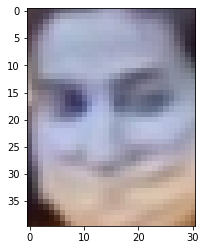

In [ ]:
image=cv2.imread(Path)
x, y, w, h = face_location1[5]
plt.imshow(image[  x:w,h:y])

In [ ]:
# Path = '/content/drive/MyDrive/ML_Project/ClassroomPicture/pp.jpg'

# image = face_recognition.load_image_file(Path)

# face_locations = face_recognition.face_locations(image)

# encodesCurrentFrame = face_recognition.face_encodings(image, face_locations)

In [ ]:
# len(face_locations)

15

Face Detected:  21
h1
Dimension: 109 137
Dimension: 38 49
Dimension: 49 59
Dimension: 66 71
Dimension: 40 48
Dimension: 31 40
Dimension: 74 87
Dimension: 27 32
Dimension: 27 34
Dimension: 51 58
Dimension: 40 51
Dimension: 61 75
Dimension: 37 41
Dimension: 32 41
Dimension: 34 40
Dimension: 25 30
Dimension: 83 101
Dimension: 39 52
Dimension: 57 58
Dimension: 56 55
Dimension: 27 29


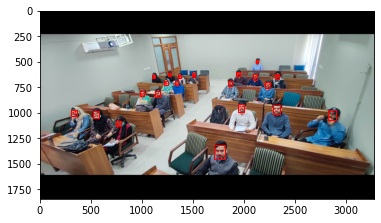

In [ ]:
# #!/usr/bin/python
# # -*- coding: utf-8 -*-
# from matplotlib import pyplot
# from matplotlib.patches import Rectangle
# from matplotlib.patches import Circle
# from mtcnn.mtcnn import MTCNN


# def draw_image_with_boxes(filename, result_list):

#     data = pyplot.imread(filename)
#     pyplot.imshow(data)

#     ax = pyplot.gca()
#     print('h1')
#     for result in result_list:

#        # a = 1

        

#         (x, y, width, height) = result['box']
#         print('Dimension:' ,width, height)
#         rect = Rectangle((x, y), width, height, fill=False, color='red')

#         ax.add_patch(rect)

#         for (key, value) in result['keypoints'].items():

#             dot = Circle(value, radius=2, color='red')
#             ax.add_patch(dot)

#     pyplot.show()


# # filename = 'pp.jpg'
# # filename = 'IMG_20220315_095307.jpg'

# # filename = '/content/IMG_20220315_095343_1.jpg'
# filename = '/content/drive/MyDrive/ML_Project/ClassroomPicture/IMG_20220315_095343_1.jpg'

# pixels = pyplot.imread(filename)

# detector = MTCNN()

# faces = detector.detect_faces(pixels)
# print ('Face Detected: ', len(faces))

# draw_image_with_boxes(filename, faces)


In [ ]:
# print(faces[0]['box'])

[1710, 1319, 109, 137]


In [ ]:
# x,y,w,h = faces[0]['box']

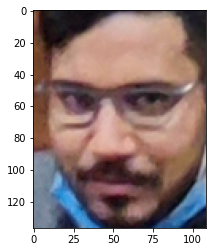

In [ ]:
# plt.imshow(image[y:y+h, x:x+w])

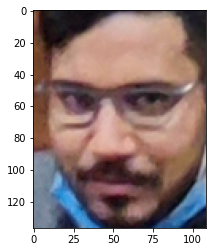

In [ ]:
# x,y,w,h = faces[0]['box']

# x1 = y
# w1 = y+h
# h1 = x
# y1 = x+w


# plt.imshow(image[  x1:w1,h1:y1])

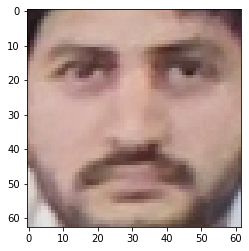

In [ ]:
# x, y, w, h = face_locations[0]
# plt.imshow(image[  x:w,h:y])

In [ ]:
# print(face_locations)

[(923, 2008, 986, 1946), (1334, 1811, 1441, 1704), (694, 1884, 737, 1840), (942, 2365, 1032, 2275), (636, 2128, 679, 2085), (799, 1024, 842, 981), (698, 1357, 734, 1321), (706, 2261, 758, 2209), (486, 2149, 522, 2113), (690, 1257, 726, 1221), (993, 577, 1055, 515), (614, 1525, 650, 1489), (598, 1965, 641, 1922), (630, 1389, 666, 1353), (626, 2341, 662, 2305)]


In [ ]:
# face_location1 = []
# for face in faces:
#   x,y,w,h = face['box']

#   x1 = y
#   w1 = y+h
#   h1 = x
#   y1 = x+w

#   a = (x1, y1, w1, h1)
#   face_location1.append(a)




In [ ]:
# print(face_location1)

[(1319, 1819, 1456, 1710), (618, 2344, 667, 2306), (699, 2258, 758, 2209), (982, 585, 1053, 519), (791, 1025, 839, 985), (692, 1357, 732, 1326), (927, 2356, 1014, 2282), (626, 1130, 658, 1103), (483, 2142, 517, 2115), (789, 1183, 847, 1132), (690, 1881, 741, 1841), (915, 2007, 990, 1946), (601, 1964, 642, 1927), (607, 1525, 648, 1493), (685, 1255, 725, 1221), (630, 1383, 660, 1358), (974, 2904, 1075, 2821), (625, 2125, 677, 2086), (971, 368, 1029, 311), (1079, 801, 1134, 745), (609, 1286, 638, 1259)]


In [ ]:
# file_name = "/content/drive/MyDrive/ML_Project/StudentName.pkl"


# open_file = open(file_name, "rb")
# personNames = pickle.load(open_file)
# open_file.close()


# file_name = "/content/drive/MyDrive/ML_Project/StudentEncoding.pkl"

# open_file = open(file_name, "rb")
# encodeListKnown = pickle.load(open_file)
# open_file.close()

In [ ]:
# encodesCurrentFrame = face_recognition.face_encodings(image, face_location1)

In [ ]:
# Name_Dist = {}
# for encodeFace, faceLoc in zip(encodesCurrentFrame, face_location1):
#         matches = face_recognition.compare_faces(encodeListKnown, encodeFace)
#         # print(matches)
#         faceDis = face_recognition.face_distance(encodeListKnown, encodeFace)
#         # print(faceDis)
#         matchIndex = np.argmin(faceDis)
#         # print(matchIndex)
#         if faceDis[matchIndex] < 0.50:
#             name = personNames[matchIndex].upper()
#             print(name)
#             Name_Dist[name] = faceLoc
#         else:
#             print('Unknown')
#             Name_Dist['Unknown'] = faceLoc


Unknown
Unknown
ABDULLAH1
Unknown
Unknown
Unknown
Unknown
Unknown
BILALSHAH
Unknown
ABDURREHMAN
RAZA
Unknown
ABDULLAHTAQUEER
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
SHAHEER2
